In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-tachygraphy/Tachygraphy_EmotionMoodtags_Dataset.csv
/kaggle/input/dataset-tachygraphy/Tachygraphy_dataset_main.csv


# DATASET & PREPROCESSING

In [2]:
import emoji
from bs4 import BeautifulSoup
import os
import re
import string
import json

'''For emoji cleaning'''

'For emoji cleaning'

In [3]:
dataset = pd.read_csv('/kaggle/input/dataset-tachygraphy/Tachygraphy_dataset_main.csv')

In [4]:
df=dataset

In [5]:
print(df.isnull().sum())

Text         1
Meaning      1
Sentiment    0
dtype: int64


In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [7]:
def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

In [8]:
def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_contractions(text, contraction_mapping)
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, punct, punct_mapping)
#     text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [9]:
df.rename(columns={'Text':'text', 'Sentiment':'sentiment_polarity'}, inplace=True)

In [10]:
df.drop(columns=['Meaning'], inplace=True)

In [11]:
df.dropna(subset=['text', 'sentiment_polarity'], inplace=True) # Dropping NULL values

In [12]:
df.info()
# df['text'] = df['text'].astype('str')
# df['sentiment_polarity'] = df['sentiment_polarity'].astype('str')

<class 'pandas.core.frame.DataFrame'>
Index: 4957 entries, 0 to 4957
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                4957 non-null   object
 1   sentiment_polarity  4957 non-null   object
dtypes: object(2)
memory usage: 116.2+ KB


In [13]:
df['text'] = df['text'].apply(lambda x: text_preprocessing_pipeline(x))
df['sentiment_polarity'] = df['sentiment_polarity'].apply(lambda x: text_preprocessing_pipeline(x))

In [14]:
df

,text,sentiment_polarity
0,last session of the day,neutral
1,shanghai is also really exciting precisely sky...,positive
2,submit the report asap,negative
3,happy bday,positive
4,the ogs i like it,positive
...,...,...
4953,make a pet face wtf wrong with me tonight haha,negative
4954,i dnt care anymore boyz is not worth d drama,negative
4955,no relationship is perfect tho me bae goo from...,negative
4956,over here tryna get my nail polishes and shit lol,negative


In [15]:
bin_polar = pd.get_dummies(df['sentiment_polarity'], prefix='', prefix_sep='')

In [16]:
bin_polar = bin_polar.astype(int)

In [17]:
bin_polar

,negative,neutral,positive
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
4953,1,0,0
4954,1,0,0
4955,1,0,0
4956,1,0,0


In [18]:
df = pd.concat([df, bin_polar], axis=1)
df.head()

,text,sentiment_polarity,negative,neutral,positive
0,last session of the day,neutral,0,1,0
1,shanghai is also really exciting precisely sky...,positive,0,0,1
2,submit the report asap,negative,1,0,0
3,happy bday,positive,0,0,1
4,the ogs i like it,positive,0,0,1


In [19]:
# df.drop(columns=['sentiment_polarity'], inplace=True)
df.head()

,text,sentiment_polarity,negative,neutral,positive
0,last session of the day,neutral,0,1,0
1,shanghai is also really exciting precisely sky...,positive,0,0,1
2,submit the report asap,negative,1,0,0
3,happy bday,positive,0,0,1
4,the ogs i like it,positive,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4957 entries, 0 to 4957
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                4957 non-null   object
 1   sentiment_polarity  4957 non-null   object
 2   negative            4957 non-null   int64 
 3   neutral             4957 non-null   int64 
 4   positive            4957 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 232.4+ KB


In [21]:
sentiment_polarity_label_mapping = {
    0: "negative", 1: "neutral", 2: "positive"
}

In [22]:
sentiment_polarity_label_mapping_rev = {
    'negative': 0, 'neutral': 1, 'positive': 2
}

In [23]:
SENTIMENT_POLARITY_LABELS = [
    "negative", "neutral", "positive"
]

In [24]:
def test_train_split(dataset, test_ratio=0.1):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [25]:
train_ds_pd, validation_ds_pd = test_train_split(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(validation_ds_pd)))

4455 examples in training, 502 examples in testing.


In [26]:
train_ds_pd = train_ds_pd.reset_index(drop=True)
validation_ds_pd = validation_ds_pd.reset_index(drop=True)

In [27]:
train_ds_pd.head()

,text,sentiment_polarity,negative,neutral,positive
0,last session of the day,neutral,0,1,0
1,shanghai is also really exciting precisely sky...,positive,0,0,1
2,submit the report asap,negative,1,0,0
3,happy bday,positive,0,0,1
4,the ogs i like it,positive,0,0,1


In [28]:
sentiment_labels = np.array(train_ds_pd['sentiment_polarity'])
sentiment_labels

array(['neutral', 'positive', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [29]:
train_ds_pd.drop(columns=['sentiment_polarity'], inplace=True)
validation_ds_pd.drop(columns=['sentiment_polarity'], inplace=True)

In [30]:
train_ds_pd.head()

,text,negative,neutral,positive
0,last session of the day,0,1,0
1,shanghai is also really exciting precisely sky...,0,0,1
2,submit the report asap,1,0,0
3,happy bday,0,0,1
4,the ogs i like it,0,0,1


In [31]:
validation_ds_pd.head()

,text,negative,neutral,positive
0,that is great weee visitors,0,0,1
1,my bike was put on holdshould have known that ...,1,0,0
2,there is a faux gothy chick looking at me sorr...,0,1,0
3,i am sorry at least it is friday,1,0,0
4,is watching acoustic performances in the mood ...,0,1,0


In [32]:
sentiment_indexed_labels = np.array([sentiment_polarity_label_mapping_rev[label] for label in sentiment_labels])
sentiment_indexed_labels

array([1, 2, 0, ..., 0, 0, 0])

In [33]:
import torch
import torch.nn
import torch.nn as nn

## Calculating Class Weights for each labels to avoid imbalanced distribution

In [34]:
class_counts = np.bincount(sentiment_indexed_labels)
total_samples = len(sentiment_labels)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = class_weights / class_weights.sum()
class_weights = torch.tensor(class_weights, dtype=torch.float)
class_weights

tensor([0.3490, 0.3153, 0.3357])

## Class Weight NOTE
### This class weights are for the training dataset and are to be used while training.

### SETTING CUDA

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
from transformers import RobertaTokenizer, RobertaModel
from transformers import DebertaV2Model, DebertaV2Tokenizer
from torch.utils.data import Dataset, DataLoader

In [37]:
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## TORCH IMPORTS

In [38]:
from torch.optim import AdamW
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
import optuna
# from optuna.integration import PyTorchLightningPruner
from ray import tune
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.schedulers import ASHAScheduler
# from ray.tune.integration.pytorch import TuneReportCallback
from torch.amp import GradScaler, autocast
# from ray.tune.integration.optuna import OptunaSearch
from ray.tune.search.optuna import OptunaSearch
from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch
from torch import autocast
# from ray import tune
# from ray.tune.integration.tensorboard import TensorBoardReporter
from ray.tune.logger import TBXLogger
from torch.utils.tensorboard import SummaryWriter
from ray.train import report
# from ray.tune.integration.jupyter import JupyterNotebookReporter
from ray.tune import JupyterNotebookReporter
# from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR
from ray.tune.schedulers import HyperBandScheduler, AsyncHyperBandScheduler

2024-08-30 13:08:15,667	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-08-30 13:08:16,257	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


# DATASET CONFIG & ENCODING

In [39]:
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
#         text = self.data.iloc[index, 0]
#         labels = self.data.iloc[index, 1:].values.astype(float)
        text = str(self.data.iloc[index]['text'])
        labels = self.data.iloc[index][['negative', 'neutral', 'positive']].values.astype(np.float32)

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_token_type_ids=False
        )

        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        return {
            'input_ids': torch.tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
            'labels': torch.tensor(labels, dtype=torch.float)
        }

# MODEL DEFINITION

In [40]:
class SentimentModel(nn.Module):
    def __init__(self, roberta_model, n_classes, dropout_rate):
        super(SentimentModel, self).__init__()
        self.roberta = roberta_model
        self.drop = nn.Dropout(p=dropout_rate)
        self.fc1 = nn.Linear(self.roberta.config.hidden_size, 256)  # Reduced neurons
        self.relu = nn.ReLU()
        self.out = nn.Linear(256, n_classes)
        
    def forward(self, input_ids, attention_mask):
        # Get the RoBERTa output
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls_token_state = output.last_hidden_state[:, 0, :]
        # Pass through the custom layers
        output = self.drop(cls_token_state)
        output = self.relu(self.fc1(output))
#         output = self.drop(output)
        return self.out(output)

## Other Models to try out

In [41]:
# class SentimentModel(nn.Module):
#     def __init__(self, roberta_model, n_classes, dropout_rate):
#         super(SentimentModel, self).__init__()
#         self.roberta = roberta_model
#         self.drop = nn.Dropout(p=dropout_rate)
#         self.fc1 = nn.Linear(self.roberta.config.hidden_size, 512)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(512, 256)
#         self.out = nn.Linear(256, n_classes)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         # Get the RoBERTa output
#         output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         cls_token_state = output.last_hidden_state[:, 0, :]
#         # Pass through the custom layers
#         output = self.drop(cls_token_state)
# #         output = cls_token_state
#         output = self.relu(self.fc1(output))
#         output = self.drop(output)
#         output = self.relu(self.fc2(output))
# #         output = self.drop(output)
#         return self.out(output)

In [42]:
# class AdvancedPooling(nn.Module):
#     def __init__(self, hidden_size):
#         super(AdvancedPooling, self).__init__()
#         self.hidden_size = hidden_size

#     def forward(self, hidden_states):
#         cls_output = hidden_states[:, 0, :]  # [CLS] token output
#         mean_output = hidden_states.mean(dim=1)  # Mean pooling over sequence
#         max_output, _ = hidden_states.max(dim=1)  # Max pooling over sequence
#         combined_output = torch.cat([cls_output, mean_output, max_output], dim=1)
#         return combined_output

In [43]:
# class SentimentModel(nn.Module):
#     def __init__(self, roberta_model, n_classes, dropout_rate):
#         super(SentimentModel, self).__init__()
#         self.roberta = roberta_model
#         self.drop = nn.Dropout(p=dropout_rate)
#         self.fc1 = nn.Linear(self.roberta.config.hidden_size * 3, 512)
#         self.attention_pooling = AdvancedPooling(hidden_size=self.roberta.config.hidden_size)
#         self.drop = nn.Dropout(p=dropout_rate)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(512, 256)
#         self.out = nn.Linear(256, n_classes)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         cls_output = output.last_hidden_state[:, 0, :]  # Extract [CLS] token representation
#         hidden_states = output.last_hidden_state  # Sequence hidden states
#         pooled_output = self.attention_pooling(hidden_states)  # Attention pooling  # Combine CLS and attention pooling
#         output = self.drop(pooled_output)
#         output = self.relu(self.fc1(output))
#         output = self.drop(output)
#         output = self.relu(self.fc2(output))
#         output = self.drop(output)
#         return self.out(output)

## TRAIN & VALIDATION
### Custom metric is a metric for determining the best model free from any overfitting, underfitting. ```custom_metric = (avg_val_loss−val_accuracy) + α × ∣avg_train_loss−avg_val_loss∣ + β × ∣val_accuracy-train_accuracy∣``` This metric balances between low validation loss, high validation accuracy, and penalizing large discrepancies between training and validation loss. Note that, in the model selection we have used ```α = β = 0.5```


### But, if we have probabilistic values as input and output we cannot directly calculate the accuracy, infact we need to rely on loss only. ```custom_metric = avg_val_loss + α × ∣avg_train_loss−avg_val_loss∣```

In [44]:
# Custom metric calculation function
def calculate_custom_metric(avg_val_loss, val_accuracy, avg_train_loss, train_accuracy, alpha=0.5, beta=0.5):
    loss_diff = abs(avg_train_loss - avg_val_loss)
    accuracy_diff = abs(train_accuracy - val_accuracy)
    custom_metric = avg_val_loss - val_accuracy + alpha * loss_diff + beta * accuracy_diff
    return custom_metric

### Early Stopping

In [45]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        """
        EarlyStopping to stop training when a metric has stopped improving.

        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
#             if self.verbose:
#                 print(f'Validation loss improved to {val_loss:.4f}')
#             torch.save(model.state_dict(), 'checkpoint.pt')
        else:
            self.counter += 1
#             if self.verbose:
#                 print(f'Validation loss did not improve. Patience: {self.patience}, Counter: {self.counter}')
        
        if self.counter >= self.patience:
            self.early_stop = True

In [46]:
# Define the training function with variable parameters
def train_model(config, train_dataset, val_dataset, device):
#     model = SentimentModel(
#         roberta_model=RobertaModel.from_pretrained("roberta-base"),
#         n_classes=3,
#         dropout_rate=config["dropout_rate"]
#     )
    
    model = SentimentModel(
        roberta_model=DebertaV2Model.from_pretrained('microsoft/deberta-v3-base'),
        n_classes=3,
        dropout_rate=config["dropout_rate"]
    )
    model = model.to(device)
#     optimizer = optim.Adam(model.parameters(), lr=config["lr"])
    optimizer = optim.AdamW(model.parameters(), lr=config["lr"], weight_decay=config["weight_decay"])
    criterion = nn.BCEWithLogitsLoss()
#     class_weights_tmp = torch.tensor(class_weights, dtype=torch.float32).to(device)
#     criterion = nn.CrossEntropyLoss(weight=class_weights_tmp)
#     criterion = nn.BCELoss()
    scaler = GradScaler()  # Initialize GradScaler
    
    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)
    
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
    
    early_stopping = EarlyStopping(patience=3, verbose=True)
    
    for epoch in range(config["epochs"]):  # Ensure epochs are passed from config
        model.train()
        total_train_loss = 0.0
        correct_train_preds = 0
        total_train_preds = 0
        
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()
#             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

            with autocast(device_type=device.type):  # Mixed precision
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs, labels)

            probabilities = torch.sigmoid(outputs)
            predictions = torch.zeros_like(probabilities)
            max_indices = torch.argmax(probabilities, dim=1)
            predictions.scatter_(1, max_indices.unsqueeze(1), 1)
            predictions = predictions.float()
                
#                 loss = criterion(predictions, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
#             outputs = torch.sigmoid(outputs)  
            
# NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# If we use BCELoss then pass the sigmoid applied output.
            
            total_train_loss += loss.item()
#             correct_train_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# #             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#             total_train_preds += labels.size(0)

#             predicted_labels = (outputs > 0.5).float()
#             correct_train_preds += (predicted_labels == labels).sum().item()
#             total_train_preds += labels.numel()

#             correct_train_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
#             total_train_preds += labels.numel()

#             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#             total_train_preds += labels.size(0)

            correct_train_preds += (predictions == labels).sum().item()
            total_train_preds += labels.numel()
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train_preds / total_train_preds

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        correct_val_preds = 0
        total_val_preds = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["labels"].to(device)

#                 outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#                 loss = criterion(outputs, labels)
                
                with autocast(device_type=device.type):
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                    loss = criterion(outputs, labels)

                probabilities = torch.sigmoid(outputs)
                predictions = torch.zeros_like(probabilities)
                max_indices = torch.argmax(probabilities, dim=1)
                predictions.scatter_(1, max_indices.unsqueeze(1), 1)
                predictions = predictions.float()
                
#                     loss = criterion(predictions, labels)
                    
#                 outputs = torch.sigmoid(outputs)
                
# NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# If we use BCELoss then pass the sigmoid applied output.
                
                total_val_loss += loss.item()
#                 correct_val_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# #                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#                 total_val_preds += labels.size(0)
    
#                 predicted_labels = (outputs > 0.5).float()
#                 correct_val_preds += (predicted_labels == labels).sum().item()
#                 total_val_preds += labels.numel()
                
#                 correct_val_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
#                 total_val_preds += labels.numel()

#                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#                 total_val_preds += labels.size(0)

                correct_val_preds += (predictions == labels).sum().item()
                total_val_preds += labels.numel()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_val_preds / total_val_preds
#         custom_metric = avg_val_loss - val_accuracy
        custom_metric = calculate_custom_metric(avg_val_loss, val_accuracy, avg_train_loss, train_accuracy)

        # Report metrics using ray.train.report
        report({
            "loss": avg_val_loss,
            "accuracy": val_accuracy,
            "train_loss": avg_train_loss,
            "train_accuracy": train_accuracy,
            "custom_metric": custom_metric,
            "early_stopping_epoch": epoch + 1,
        })
        
        # Learning rate scheduler step
        scheduler.step(avg_val_loss)
        
        # Check for early stopping
        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
#             print("Early stopping")
            break
    

        # Save the model checkpoint after each epoch
#         trial_dir = os.path.join(os.environ["TUNE_TRIAL_DIR"], "checkpoint.pt")
#         torch.save(model.state_dict(), 'checkpoint.pt')
#         checkpoint_path = f"/kaggle/working/checkpoint_epoch_{epoch}.pt"
#         torch.save(model.state_dict(), checkpoint_path)
    
    return model

def train_fn(config):
    # Load your data here
#     tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

    train_dataset = SentimentDataset(train_ds_pd, tokenizer, max_len=128)
    val_dataset = SentimentDataset(validation_ds_pd, tokenizer, max_len=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    train_model(config, train_dataset, val_dataset, device)

## SEARCH SPACE

In [47]:
search_space = {
    'dropout_rate': tune.choice([0.2, 0.25, 0.27, 0.3, 0.32, 0.35, 0.4]),
    'batch_size': tune.choice([32, 64]),
    'weight_decay': tune.choice([1e-6, 2e-6, 1e-5, 2e-5, 1e-4, 2e-4, 5e-5, 5e-6, 1e-2, 1e-3]),
    'lr': tune.choice([1e-6, 1e-5, 2e-5, 1e-4, 2e-4, 2e-6, 3e-6, 5e-6, 3e-5, 5e-5, 2e-7, 1e-7, 1e-3, 5e-7]),
    'epochs': tune.choice([5, 7, 10, 12, 15, 20])
}

In [48]:
# search_space = {
#     'dropout_rate': tune.uniform(0.1, 0.5),
#     'batch_size': tune.choice([16, 32, 64]),
#     'weight_decay': tune.loguniform(1e-6, 1e-1),
#     'lr': tune.loguniform(1e-6, 1e-1),
#     'epochs': tune.choice([5, 7, 10, 12, 15, 20])
# }

## SEARCH ALGO

In [49]:
optuna_search = OptunaSearch(
    metric="accuracy",
    mode="max"
)

## SCHEDULER ALGO

In [50]:
scheduler = ASHAScheduler(
    metric='accuracy',
    mode='max',
    max_t=22,
    grace_period=3,
    reduction_factor=2
)

## REPORTER

In [51]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [52]:
# %load_ext tensorboard
# %tensorboard --logdir /kaggle/working/tensorboard_logs


# ray.init(ignore_reinit_error=True)
# reporter = CLIReporter(
#     metric_columns=["loss", "accuracy", "custom_metric", "training_iteration", "train_loss", "train_accuracy", "early_stopping_epoch"],
#     print_intermediate_tables=False
# )

reporter = JupyterNotebookReporter(
    metric_columns=["loss", "accuracy", "custom_metric", "training_iteration", "train_loss", "train_accuracy", "early_stopping_epoch"],
    print_intermediate_tables=False
)

# tuner = tune.run(
#     train_fn,
#     config=search_space,
#     num_samples=25,
#     progress_reporter=reporter,
#     resources_per_trial={"cpu": 4, "gpu": 2},  # Adjust resources as needed
#     scheduler=ASHAScheduler(
#         metric="accuracy",
#         mode="max",
#         max_t=15,
#         grace_period=1,
#         reduction_factor=2
#     )
# )

# reporter = TensorBoardReporter(
#     metric_columns=["loss", "accuracy", "training_iteration", "train_loss", "train_accuracy"]
# )


result = tune.run(
    train_fn,
    resources_per_trial={"cpu": 2, "gpu": 1},
    config=search_space,
    num_samples=100,
    scheduler=scheduler,
    progress_reporter=reporter,
    search_alg=optuna_search
)

2024-08-30 13:08:36,553	INFO worker.py:1753 -- Started a local Ray instance.
2024-08-30 13:08:37,956	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-08-30 13:08:37,962	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
[I 2024-08-30 13:08:38,029] A new study created in memory with name: optuna
(train_fn pid=342) /opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
(train_fn pid=342)   warnings.warn(
(t

Trial name,accuracy,custom_metric,early_stopping_epoch,loss,train_accuracy,train_loss
train_fn_01a9b4f9,0.583001,0.074525,3,0.634506,0.554807,0.652353
train_fn_0623ad38,0.590969,0.0643425,3,0.635184,0.566031,0.650501
train_fn_06a4851e,0.835325,-0.203042,5,0.456862,0.928769,0.199464
train_fn_08497c91,0.837981,-0.294426,8,0.417639,0.914852,0.242675
train_fn_0e814203,0.792829,-0.276636,6,0.466401,0.756828,0.529983
train_fn_121fffcd,0.816733,-0.156733,6,0.473835,0.924429,0.209203
train_fn_12df181d,0.816733,-0.0861577,5,0.501871,0.939544,0.167274
train_fn_12e5f0fe,0.567065,0.0750191,3,0.637905,0.559147,0.637464
train_fn_132bcca2,0.559097,0.133375,3,0.686994,0.550917,0.689771
train_fn_17c637c2,0.540505,0.110373,3,0.642084,0.549121,0.651055


(train_fn pid=480) /opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
(train_fn pid=480)   warnings.warn(
(train_fn pid=560) /opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
(train_fn pid=560)   warnings.warn(
(train_fn pid=638) /opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_s

## REPORTER RESULTS

In [53]:
# best_trial = result.get_best_trial("loss", "min", "last")
best_trial = result.get_best_trial("accuracy", "max", "last")
# best_checkpoint_dir = best_trial.checkpoint.value
print(f"Best trial config: {best_trial.config}")
print(f"Best trial final validation loss: {best_trial.last_result['loss']}")
print(f"Best trial final validation accuracy: {best_trial.last_result['accuracy']}")
print(f"Best trial final training loss: {best_trial.last_result['train_loss']}")
print(f"Best trial final training accuracy: {best_trial.last_result['train_accuracy']}")
print(f"Best trial final custom_metric: {best_trial.last_result['custom_metric']}")
print(f"Best trial final Early Stopping Epoch: {best_trial.last_result['early_stopping_epoch']}")

Best trial config: {'dropout_rate': 0.4, 'batch_size': 64, 'weight_decay': 2e-05, 'lr': 3e-05, 'epochs': 5}
Best trial final validation loss: 0.4020007289946079
Best trial final validation accuracy: 0.848605577689243
Best trial final training loss: 0.2114465691149235
Best trial final training accuracy: 0.9254769921436589
Best trial final custom_metric: -0.312892061527585
Best trial final Early Stopping Epoch: 5


## Function to Train the Model with the Best Configuration

In [54]:
def train_best_model(config, device, train_dataset = train_ds_pd, val_dataset = validation_ds_pd):
    print(f"""
    Tuning Model with:
    {config}
    """)
#     model = SentimentModel(
#         roberta_model=RobertaModel.from_pretrained("roberta-base"),
#         n_classes=3,
#         dropout_rate=config["dropout_rate"]
#     )
    model = SentimentModel(
        roberta_model=DebertaV2Model.from_pretrained('microsoft/deberta-v3-base'),
        n_classes=3,
        dropout_rate=config["dropout_rate"]
    )
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=config["lr"], weight_decay=config["weight_decay"])
    criterion = nn.BCEWithLogitsLoss()
#     class_weights_tmp = torch.tensor(class_weights, dtype=torch.float32).to(device)
#     criterion = nn.CrossEntropyLoss(weight=class_weights_tmp)
#     criterion = nn.BCELoss()
    scaler = GradScaler()
    
    ## DATASET ENCODING
    
    train_dataset = SentimentDataset(train_ds_pd, tokenizer, max_len=128)
    val_dataset = SentimentDataset(validation_ds_pd, tokenizer, max_len=128)

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)
    
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
    
    early_stopping = EarlyStopping(patience=5, verbose=True)

    best_val_loss = float("inf")
    best_model_path = None
    
    # Early stopping parameters
    patience = 5
    best_val_loss = float('inf')
    epochs_since_improvement = 0

    
    ### Running for config epochs +patience+1 for introducing noise. 
    
    for epoch in range((config["epochs"]+patience+1)):
        model.train()
        total_train_loss = 0.0
        correct_train_preds = 0
        total_train_preds = 0
        
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()
#             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

            with autocast(device_type=device.type):
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs, labels)

            probabilities = torch.sigmoid(outputs)
            predictions = torch.zeros_like(probabilities)
            max_indices = torch.argmax(probabilities, dim=1)
            predictions.scatter_(1, max_indices.unsqueeze(1), 1)
            predictions = predictions.float()
                
#                 loss = criterion(predictions, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
#             outputs = torch.sigmoid(outputs)
            
# NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# If we use BCELoss then pass the sigmoid applied output.
            
            total_train_loss += loss.item()
#             correct_train_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# #             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#             total_train_preds += labels.size(0)

#             predicted_labels = (outputs > 0.5).float()
#             correct_train_preds += (predicted_labels == labels).sum().item()
#             total_train_preds += labels.numel()

#             correct_train_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
#             total_train_preds += labels.numel()

#             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#             total_train_preds += labels.size(0)

            correct_train_preds += (predictions == labels).sum().item()
            total_train_preds += labels.numel()
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train_preds / total_train_preds

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        correct_val_preds = 0
        total_val_preds = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["labels"].to(device)

#                 outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#                 loss = criterion(outputs, labels)

                with autocast(device_type=device.type):
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                    loss = criterion(outputs, labels)

                probabilities = torch.sigmoid(outputs)
                predictions = torch.zeros_like(probabilities)
                max_indices = torch.argmax(probabilities, dim=1)
                predictions.scatter_(1, max_indices.unsqueeze(1), 1)
                predictions = predictions.float()

#                     loss = criterion(predictions, labels)
                
#                 outputs = torch.sigmoid(outputs)
                
# NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# If we use BCELoss then pass the sigmoid applied output.
                
                total_val_loss += loss.item()
#                 correct_val_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# #                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#                 total_val_preds += labels.size(0)
    
#                 predicted_labels = (outputs > 0.5).float()
#                 correct_val_preds += (predicted_labels == labels).sum().item()
#                 total_val_preds += labels.numel()

#                 correct_val_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
#                 total_val_preds += labels.numel()

#                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#                 total_val_preds += labels.size(0)

                correct_val_preds += (predictions == labels).sum().item()
                total_val_preds += labels.numel()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_val_preds / total_val_preds

        # Save the model checkpoint after each epoch
        checkpoint_path = f"/kaggle/working/best_checkpoint.pt"
#         torch.save(model.state_dict(), checkpoint_path)

#         # Save the best model based on validation loss
#         if avg_val_loss < best_val_loss:
#             best_val_loss = avg_val_loss
#             best_model_path = checkpoint_path

        # Learning rate scheduler step
        scheduler.step(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_since_improvement = 0
            best_model_path = checkpoint_path
            # Save the model checkpoint with the best validation loss
#             checkpoint_path = f"/kaggle/working/best_checkpoint.pt"
#             torch.save(model.state_dict(), checkpoint_path)
            torch.save({
                'model_state_dict': model.state_dict(),
                'config': config  # Save configuration
            }, checkpoint_path)
    
        else:
            epochs_since_improvement += 1

        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print(f"Early stopping at epoch {epoch + 1}")
            print(f"Best Model Epoch Saved: {epoch - patience +1}")
#             print("Early stopping")
            break
        
#         if epochs_since_improvement >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             print(f"Best Model Epoch Saved: {epoch - patience}")
#             break
            
#         custom_metric = calculate_custom_metric(avg_val_loss, avg_train_loss)        
        custom_metric = calculate_custom_metric(avg_val_loss, val_accuracy, avg_train_loss, train_accuracy)
        print(f"""
        Validation Loss: {avg_val_loss},
        Training Loss: {avg_train_loss},
        Argmax Binary Validation Accuracy: {val_accuracy},
        Argmax Binary Training Accuracy: {train_accuracy},
        Custom Metric: {custom_metric},
        Epochs: {epoch+1}
        """)
    
    print(f"Best Validation Loss: {best_val_loss}, Best Validation accuracy: {val_accuracy}")
    
    return model, best_model_path

# BEST MODEL AFTER FINAL TRAINING & VALIDATION

In [55]:
best_config = best_trial.config

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train the model with the best configuration
best_model, best_model_path = train_best_model(best_config, device, train_ds_pd, validation_ds_pd)



    Tuning Model with:
    {'dropout_rate': 0.4, 'batch_size': 64, 'weight_decay': 2e-05, 'lr': 3e-05, 'epochs': 5}
    

        Validation Loss: 0.4173536077141762,
        Training Loss: 0.5758340746164322,
        Argmax Binary Validation Accuracy: 0.8127490039840638,
        Argmax Binary Training Accuracy: 0.669734380845492,
        Custom Metric: -0.2446478512494737,
        Epochs: 1
        

        Validation Loss: 0.3647834435105324,
        Training Loss: 0.42356979548931123,
        Argmax Binary Validation Accuracy: 0.8339973439575034,
        Argmax Binary Training Accuracy: 0.8093527871305649,
        Custom Metric: -0.42749844604411236,
        Epochs: 2
        

        Validation Loss: 0.368868213146925,
        Training Loss: 0.3417958391564233,
        Argmax Binary Validation Accuracy: 0.8406374501992032,
        Argmax Binary Training Accuracy: 0.8581369248035915,
        Custom Metric: -0.4494833127548333,
        Epochs: 3
        

        Validation Loss: 

# Save the best model


In [56]:
# Save the best model
#### Comment when wanting to select the model which is stopped early to avoid over or under fitting

# final_model_path = "/kaggle/working/final_best_model.pt"
# torch.save(best_model.state_dict(), final_model_path) 

#### Comment when wanting to select the model which is stopped early to avoid over or under fitting

final_model_path = "/kaggle/working/final_best_model.pt"
# torch.save(best_model.state_dict(), final_model_path)
torch.save({'model_state_dict': best_model.state_dict(),'config': best_config}, final_model_path)

print(f"Best model saved at: {final_model_path}")

Best model saved at: /kaggle/working/final_best_model.pt


# Load the best model

In [57]:
# Load the best model
final_model_path = "/kaggle/working/final_best_model.pt"
# final_model_path = "/kaggle/input/tachygraphy-lv2-emotion-moodtags-v1/transformers/default/1/final_best_model.pt"


checkpoint = torch.load(final_model_path)
config = checkpoint['config']

# loaded_model = SentimentModel(
#     roberta_model=RobertaModel.from_pretrained("roberta-base"),
#     n_classes=3,
#     dropout_rate=config["dropout_rate"]
# )
loaded_model = SentimentModel(
    roberta_model=DebertaV2Model.from_pretrained('microsoft/deberta-v3-base'),
    n_classes=3,
    dropout_rate=config["dropout_rate"]
)
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model = loaded_model.to(device)
loaded_model.eval()

print(f"Loaded model from {final_model_path} for inference.")


Loaded model from /kaggle/working/final_best_model.pt for inference.


# PREDICT ON RANDOM INPUT

## Prediction Function

In [58]:
def predict(text, model, tokenizer, device, max_len=128):
    inputs = tokenizer.encode_plus(
        text,
        None,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_token_type_ids=False,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
    return torch.sigmoid(outputs).cpu().numpy()

#     # Convert logits to probabilities using sigmoid
#     probabilities = torch.sigmoid(logits)
    
#     # Convert probabilities to binary predictions
#     predictions = torch.zeros_like(probabilities)
#     max_indices = torch.argmax(probabilities, dim=1)
#     predictions.scatter_(1, max_indices.unsqueeze(1), 1)
    
#     # Move predictions to CPU and convert to numpy for easy manipulation
#     predictions_array = predictions.cpu().numpy().squeeze()

#     return predictions_array

In [59]:
best_model = loaded_model
best_model = best_model.to(device)

In [60]:
import matplotlib.pyplot as plt
import plotly.express as px

## Samples & Random Predictions

Predicted sentiment polarities for 'hey! hru, wanna ply valo toni8?': [[0.00867144 0.52959716 0.45334682]]
NEAGTIVE: 0.0, NEUTRAL: 1.0, POSITIVE: 0.0


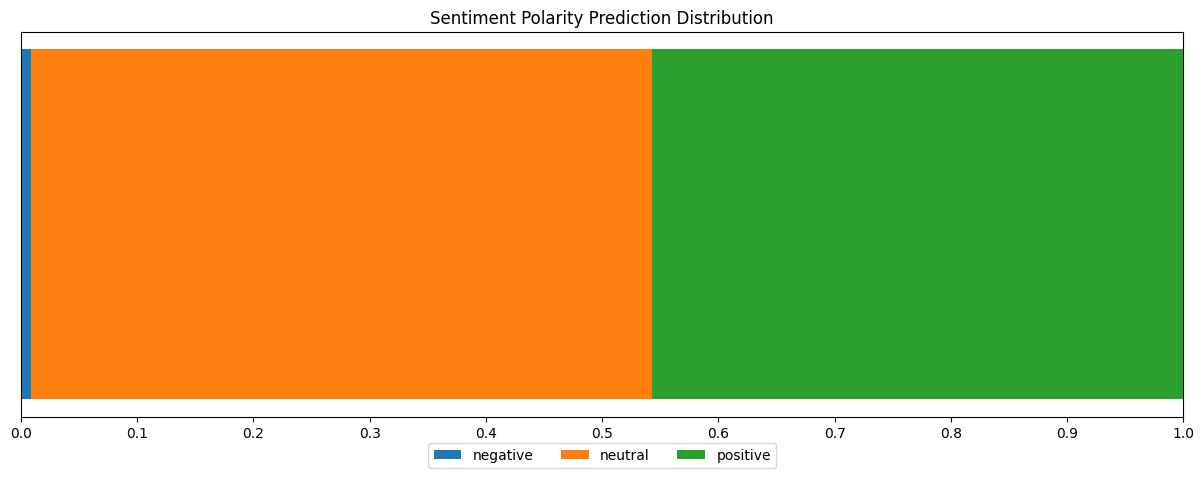

In [61]:
sample_text = "hey! hru, wanna ply valo toni8?"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
fig.show()


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()

Predicted sentiment polarities for 'what a badass char is arthur, he is the best game char ever made, i luv rdr2': [[0.00596881 0.01314257 0.9876622 ]]
NEAGTIVE: 0.0, NEUTRAL: 0.0, POSITIVE: 1.0


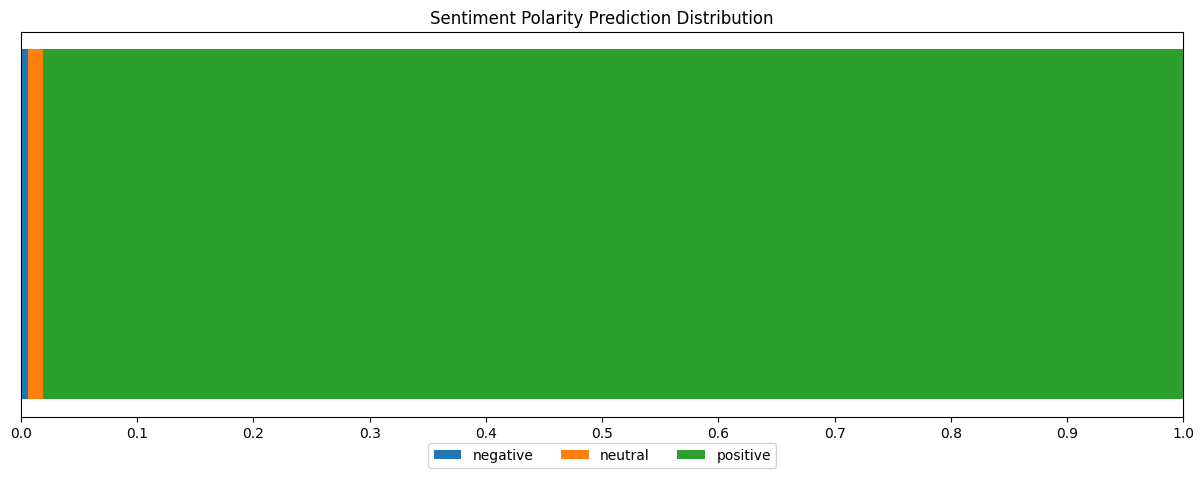

In [62]:
sample_text = "what a badass char is arthur, he is the best game char ever made, i luv rdr2"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
fig.show()


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()


Predicted sentiment polarities for 'I don't no fr y hes sooo sad.': [[0.98414916 0.0126807  0.00935807]]
NEAGTIVE: 1.0, NEUTRAL: 0.0, POSITIVE: 0.0


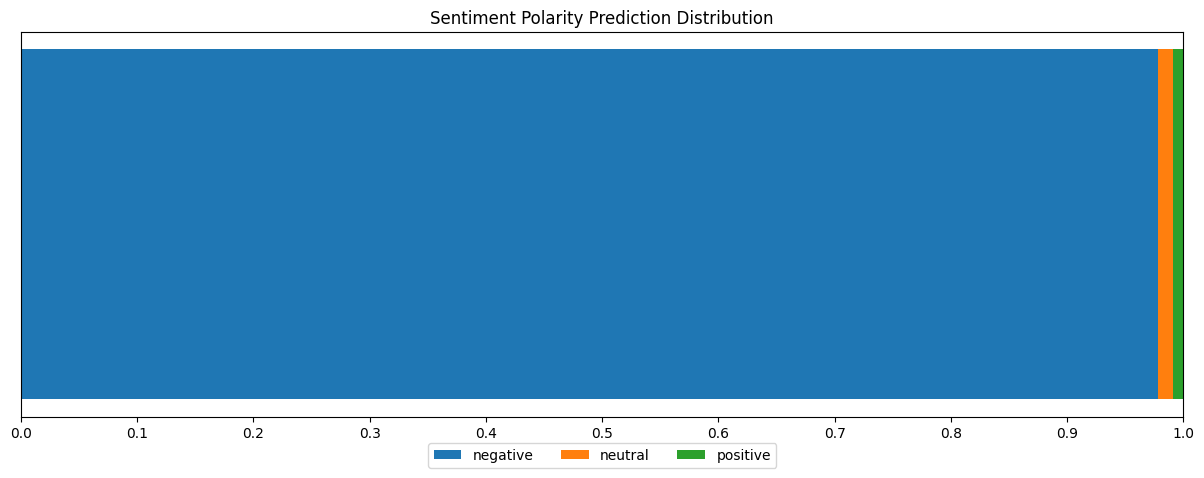

In [63]:
sample_text = "I don't no fr y hes sooo sad."
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
fig.show()


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()